In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_anomalies import *

# Testing iForest on cancer data

In [2]:
df = pd.read_csv("cancer.csv")

In [3]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


In [4]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

There are 212 data points which arw classfied as skin cancer

In [5]:
X, y = df.drop('diagnosis', axis=1), df['diagnosis']

fit time 0.14s
score time 0.97s
Computed 0.7500 TPR threshold 0.4600 with FPR 0.1345
[[309  48]
 [ 53 159]]
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7589, avg PR 0.8494


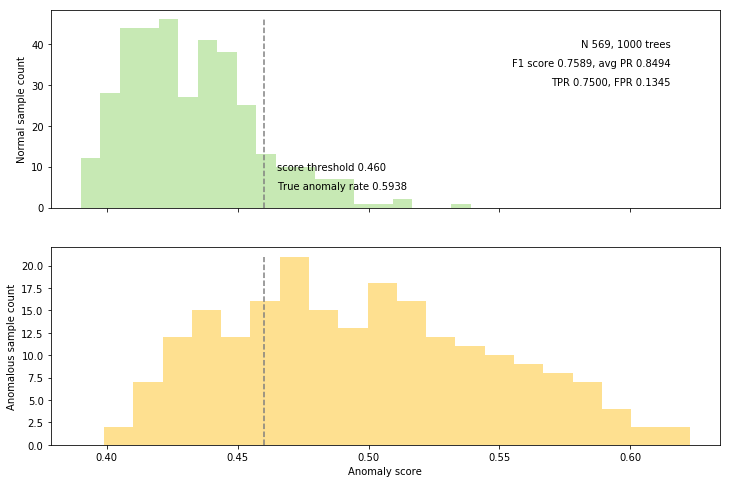

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plot_anomalies(X, y, sample_size=5, n_trees=1000, 
               desired_TPR=0.75, improved=True)

I am going to adding noise columns to the DataFrame and test if algorithm is still performs the same.

In [10]:
add_noise(df, 5)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,noise_0,noise_1,noise_2,noise_3,noise_4
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,1,-95.160208,163.743008,-46.482249,34.324721,7.560846
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,1,23.689551,66.452605,-183.347463,22.494970,-133.575176


In [11]:
X, y = df.drop('diagnosis', axis=1), df['diagnosis']

fit time 0.30s
score time 1.07s
Computed 0.7500 TPR threshold 0.4700 with FPR 0.1681
[[297  60]
 [ 51 161]]
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7436, avg PR 0.8395


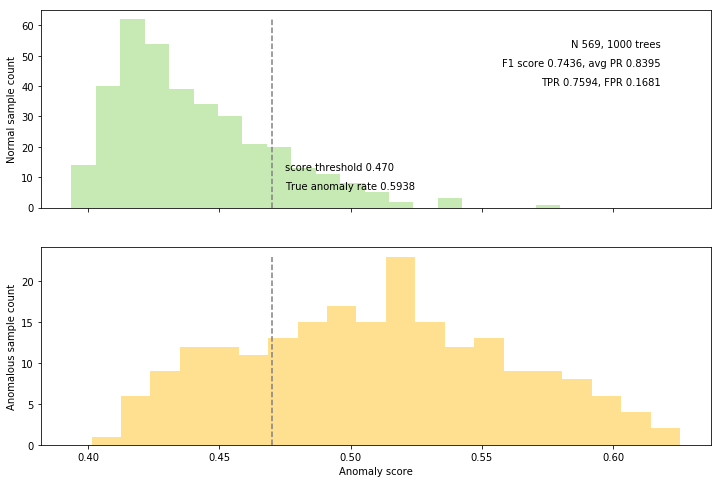

In [12]:
plot_anomalies(X, y, sample_size=5, n_trees=1000, 
               desired_TPR=0.75, improved=True)

I am able to classify cancer diagnosis using my iForest algorithm with F1 score of ~0.74-0.76.